# Perceptron
Artificial neural networks are not a recent concept; in fact, they trace their origins back to the 1960s when they took the form of perceptrons—a basic type of artificial neural network. This architecture comprises two primary node types: input nodes representing input attributes and output nodes depicting the model's output. As time passed, the perceptron concept evolved into multilayer perceptrons, now synonymous with modern artificial neural networks.
 Despite their existence for decades, the recent surge in popularity is shaped by factors such as limited computer processing power and a scarcity of training data. The current landscape is undergoing significant changes; computers are becoming faster and more powerful, and the internet serves as an abundant source of diverse data. This transformative era signifies the widespread adoption and advancement of artificial neural networks.
## Basic Architecture of a Perceptron

1. Input layer:
    The perceptron takes multiple binary input features, often denoted as $ x_1, x_2, \ldots, x_n $.
2. Weights and Bias:
    Each input is multiplied by its corresponding weight. The weights represent the importance of the respective inputs in the decision-making process of the perceptron. Mathematically, the weighted sum is calculated as $\sum_{i=1}^{n} w_i x_i$. 
    The weighted sum is then added to a bias term $b$, which represents the perceptron's tendency to fire. The bias shifts the decision boundary of the perceptron.  
   
3. Activation function:
    The weighted sum $z$ is passed through an activation function. The purpose of the activation function is to introduce non-linearity into the system.
4. Output:
    The output of the activation function is the perceptron's output, often denoted as $y$.


![6_20.png](images/6_20.png)

Image credits: Tan, P.-N., Steinbach, M., & Kumar, V. (Year). *Introduction to Data Mining* (2nd ed.). Publisher.

## How Perceptrons learn?
Perceptrons learn through a process called **perceptron learning** or the **perceptron training algorithm**. The goal is to adjust the weights and bias in such a way that the perceptron can correctly classify input patterns.
 The role of the **loss function** is crucial in this process, as it measures the discrepancy between the perceptron's predictions and the actual labels. This guides the adjustments of weights and bias to enhance the accuracy of classification. The goal is to minimize the loss function to improve the model's performance.

**Perceptron Learning Algorithm:**

1. Leht $ D_{\text{train}} = \{(x_i^\sim, y_i) \mid i = 1, 2, \ldots, n\} $ be the set of training instances.
2. Set $k \leftarrow 0$.
3. Initialize the weight vector $\mathbf{w}^{\sim^{(0)}}$ with random values.
4. **repeat**
5. $\quad$ **for each training instance** $(x_i^\sim, y_i)\ in\quad D_{\text{train}}$,
6. $\quad\quad$ compute the predicted output $\hat{y}^{(k)}$ using $\mathbf{w}^{\sim^{(k)}}$.
7. $\quad\quad$ **for each weight component** $w_j$,
8. $\quad\quad\quad$ update the weight: $w^{(k+1)}_j = w^{(k)}_j + \lambda (y_i - \hat{y}^{(k)}) x_{ij}$.
9. $\quad\quad$ **end for**
10. $\quad$ **Update** $ k \leftarrow k + 1 $.
11. **end for**
12. **Until** $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}^{(k)})  $ **is less than a threshold** $\gamma$.




## Training: XOR classification problem

In [1]:
from utility_functions import plot_confusion_matrix, plot_training_history

Can a perceptron learn the XOR function? Let's try!

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dati di input e output per XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

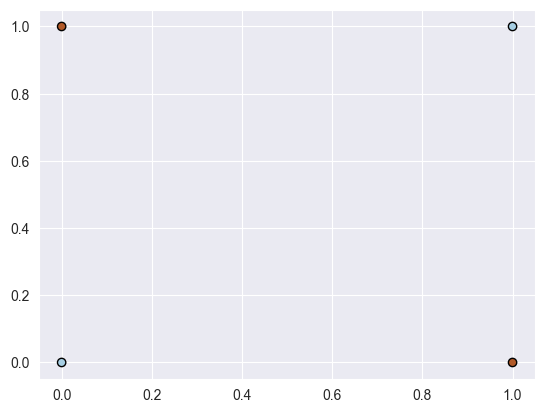

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()

Ok, it can be noticed that there is no linear decision boundary that can separate the two classes.

### Create a perceptron: what kind of activation function should we use?
What kind of activation function should we use, for the output layer?
We have a simple binary classification problem, so we can use the sigmoid function, that allows us to map the output to a probability. We can interpret the output as the probability of the input belonging to class 1, taking values > 0.5 as class 1 and values <= 0.5 as class 0.

In [5]:
# Let's create a perceptron
perceptron_model = Sequential()

perceptron_model.add(Dense(1,
        activation='sigmoid'))


### Create a perceptron: loss function and optimizer
What kind of loss function should we use?
Since we have a binary classification problem, we can use the binary crossentropy loss function.
The optimizer is the algorithm that will be used to update the weights in order to minimize the loss function. 

In [6]:
# Compile the model
perceptron_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model
hist = perceptron_model.fit(X, y,
          epochs=150,
          verbose=0)

In [7]:
# Save the model
perceptron_model.save('perceptron_model')

INFO:tensorflow:Assets written to: perceptron_model/assets


INFO:tensorflow:Assets written to: perceptron_model/assets


## Testing: XOR classification problem

1/1 [==============================] - 0s 56ms/step


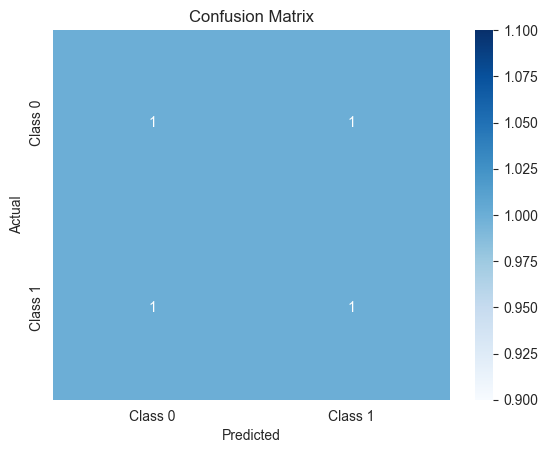

In [8]:
plot_confusion_matrix(X, y, perceptron_model)

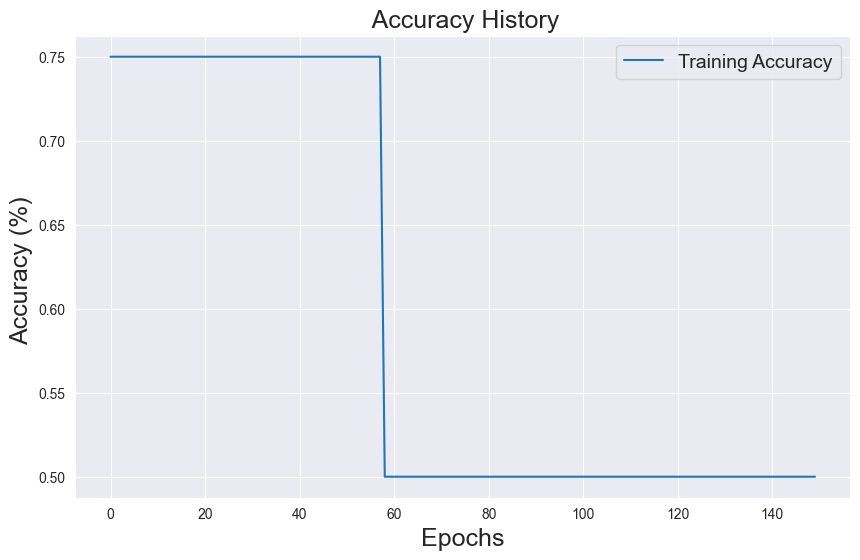

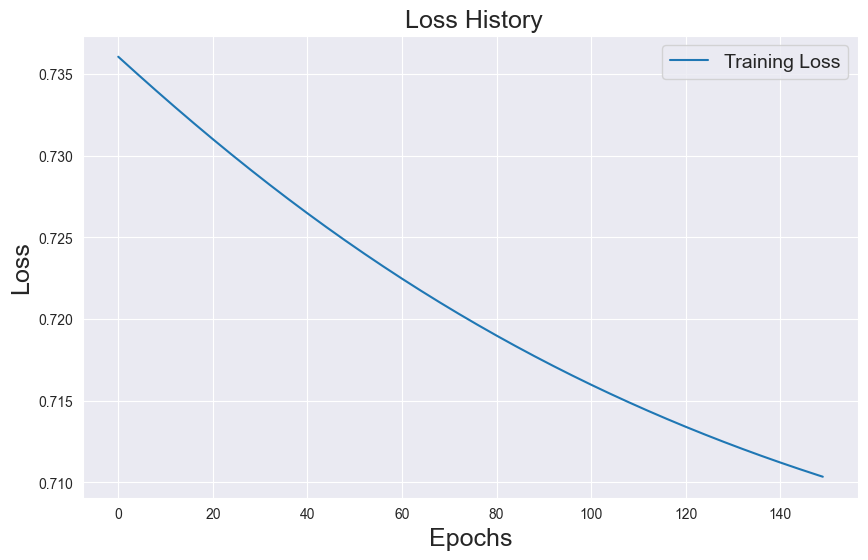

In [9]:
plot_training_history(hist)

## Perceptrons: Limitations
What happens ? It seems that the perceptron is not able to learn the XOR function. Why?
The perceptron is a linear classifier, so it can only learn linearly separable patterns. The XOR function is not linearly separable, so the perceptron is not able to learn it.
This limitation is a significant drawback, as most real-world problems are non-linear. However, this limitation can be overcome by using multilayer perceptrons, which are capable of learning non-linear patterns.


# Multilayer Neural-Netorks

We can extend the fundamental concept of a perceptron to a more structured and intricate framework by introducing a multi-layer neural network. This structured approach enables the network to learn complex patterns and nonlinear decision boundaries.

## Structure of a Neural Network
Examining a "typical" neural network, we can conceptually divide its structure into three parts: Input Layer, Hidden Layer, and Output Layer.

### Input Layer
The *input layer* is the first layer of a neural network and contains a number of neurons equal to the number of features in the dataset. Each neuron in the input layer represents a specific feature of the dataset. It's important to note that the input layer does not perform any computation on the information; instead, its primary function is to transmit the data to the first hidden layer.

In the transmission process, the feature values are multiplied by the respective weights associated with the connections between the neurons of the input layer and those of the first hidden layer. These weights represent the relative importance of each feature in contributing to the activations of neurons in the next hidden layer.

### Hidden Layer
The *hidden layer* is the core of a neural network. It consists of an arbitrary number of neurons, each of which receives input values from the input layer. Each neuron in the hidden layer calculates a linear combination of the feature values and the respective weights associated with the connections between the neurons of the input layer and those of the hidden layer. 

This linear combination is then passed through an activation function, introducing non-linearity into the system. The output of the activation function is finally passed to the neuron of the next hidden layer, and so on until the output layer. The number of hidden layers and the number of neurons in each hidden layer are two hyperparameters that must be chosen during the design of the neural network.

### Output Layer
The *output layer* is the last layer of a neural network. Its composition depends on the nature of the problem being solved:

- For **classification problems**, the output layer consists of a number of neurons equal to the number of classes in the dataset. Each neuron represents a specific class. The output layer calculates a linear combination of the feature values and the respective weights associated with the connections between the neurons of the last hidden layer and those of the output layer. This linear combination is then passed through an activation function, introducing non-linearity into the system. The output of the activation function represents the probability that the input belongs to the class represented by the neuron of the output layer. The neuron of the output layer with the highest probability determines the class predicted by the algorithm.

- For **regression problems**, where the goal is to predict a continuous value, the output layer typically consists of a single neuron. The output is the result of a linear combination of the feature values and the respective weights associated with the connections between the neurons of the last hidden layer and the output neuron. In this case, there is no activation function applied, and the output represents the continuous prediction for the regression problem.

#
![structure_of_ANN](images/structure_of_ANN.jpg)


Image credits : https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed


## How do they learn?
The key idea is to provide the network a set of training instances (X, y) and making the network predict a certain label y_hat. Initially, the weights of the network will be random, and the network will perform pretty horrible on the training data. Therefore, what will be necessary to define is a cost function, a way to communicate to the network how much it is getting wrong. However, telling the computer how bad its prediction is will not help it improve. In fact, to achieve improvements, it will be necessary to modify the weights of the network. We can imagine the cost function as a function that takes as input all the weights and biases of the network, and a numeber that says how much is getting wrong as output. Our goal is to minimize this function, but it's not always possible through analytical methods alone, so instead we ask our self: what is the direction in witch I should modify the weights to make the cost function smaller? 
The gradient is the vector that tells us the direction in witch we should modify the weights to make the cost function smaller.

### Gradient Descent



![gradient_descent](images/gradient_descent.gif)



Image credits : https://medium.com/@yennhi95zz/4-a-beginners-guide-to-gradient-descent-in-machine-learning-773ba7cd3dfe

 The gradient descent algorithm is an iterative algorithm that allows us to find the minimum of a function.
  Think of gradient descent like exploring hills. The cost function is like a hilly surface, where each point represents different parameter values. You start at a point, look around, and take a small step in the steepest downhill direction, getting closer to a valley. Repeat this until you reach a local minimum, the lowest point in a valley.

It’s important to note that some cost functions may have multiple local minima. When running gradient descent, the algorithm converges to the nearest local minimum based on the initial parameter values. If a different starting point is chosen, the algorithm may converge to a different local minimum.
 Consequentially finding an absolute minimum is not guaranteed. 

### Here is how the learning process works:
1. Initialization of the network weights randomly. These weights represent the parameters that the network will learn during training.

2. Training the network for a predetermined number of epochs:

   1. For each training instance (X, y):
   
      1. Calculate the predicted output y_hat of the network for input X.
      
      2. Calculate the error of the network by comparing y_hat with the actual label y.
      
      3. **Backpropagation**: Calculate the local error for each output node and propagate the error backward through the network, and compute the gradient of the loss function.
   
   2. **Weight Update**: Use an optimization algorithm (i.e., gradient descent) to update the weights.

3. End of training.


---

### Backpropagation: the key to learning



  
![backpropagation](images/backpropagation.gif)

Image credits :https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif

Backpropagation is the algorithm that computes the gradient of the loss function witch tells the direction in witch we should modify the weights to make the cost function smaller. Maybe thinking at the direction in a space of thousands of dimensions is not so intuitive, we can instead think about the Backpropagation as the algorithm for determining how a single training example would like change the network weights and biases. 


## Training: XOR classification problem
Can a multilayer neural-network learn the XOR function? Let's try!

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Dati di input e output per XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [87]:
# Let's create a neural network
model = Sequential()
#Multilayer creation
model.add(Dense(8,
        input_dim=2,
        activation='sigmoid'))

model.add(Dense(8,
        activation='sigmoid'))

model.add(Dense(8,
        activation='sigmoid'))

#output layer
model.add(Dense(1,
        activation='sigmoid'))

In [88]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model
hist = model.fit(X, y,
          epochs=1000,
        batch_size=4,
          verbose=0)

## Testing: XOR classification problem

1/1 [==============================] - 0s 46ms/step


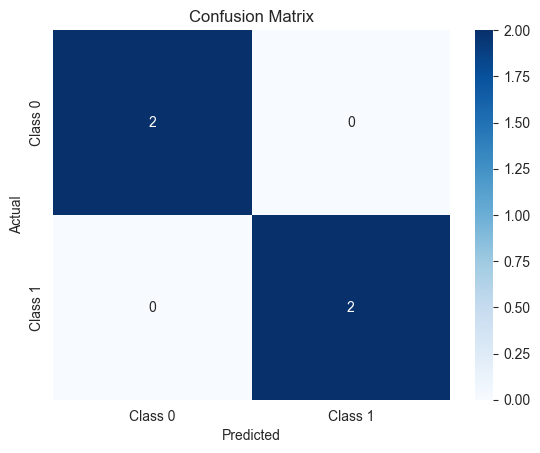

''

In [89]:
plot_confusion_matrix(X, y, model)
;

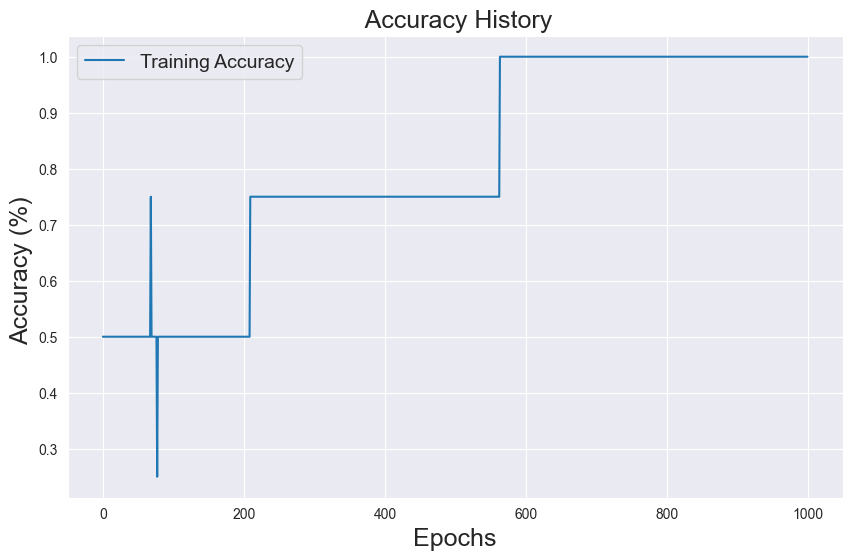

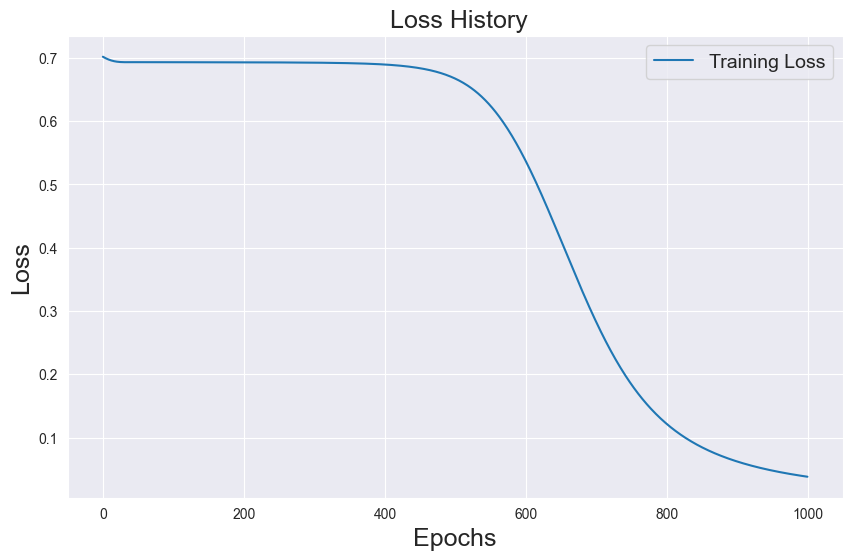

In [90]:
plot_training_history(hist)

In [91]:
#Save the model
model.save('xor_model')

INFO:tensorflow:Assets written to: xor_model/assets


INFO:tensorflow:Assets written to: xor_model/assets


## Considerations
The network is able to learn the XOR function, but it takes a lot of epochs to do so. Why? The network is simple, so it has a low capacity. It is not able to learn complex patterns, so it needs a lot of epochs to learn the XOR function.
 
Note: We're intentionally attempting to overfit the data, so it would be preferable to opt for a more complex model to compensate for the number of training epochs.

We can increase the expressiveness of the network by adding more layers and more neurons. This will increase the capacity of the network, allowing it to learn more complex patterns. 

# Decision Tree classifier Vs Neural Network classifier in XOR classification problem
Decision trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

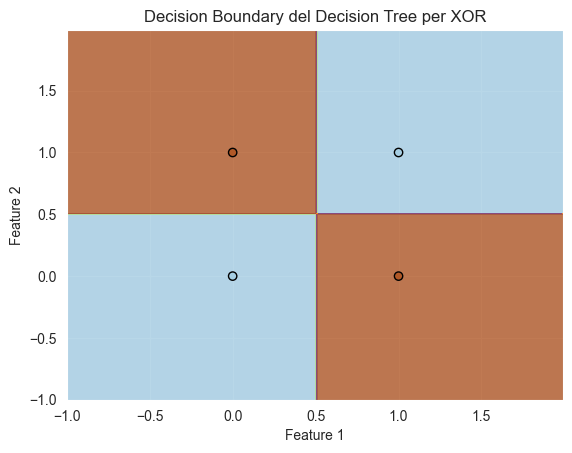

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Input e output data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_leaf_nodes=4)

# Train the Decision Tree classifier on XOR
decision_tree.fit(X, y)

# Create a meshgrid to visualize the decision boundary
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediction for each point in the meshgrid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary del Decision Tree per XOR')
plt.show()


## Conclusion
We can observe that the Decision Tree classifier is able to learn the XOR function more efficiently than the Neural Network classifier. This is because the Decision Tree classifier is a non-parametric model, this means that it does not fix "a priori" the number of parameters to be learned. In other words, the model's complexity grows with the size of the data or the complexity of the problem, and it is not limited by a predetermined number of parameters. 

So it is able to learn complex patterns without the need for a large number of training instances. On the other hand, the Neural Network classifier is a parametric model, so it needs a large number of training instances to learn complex patterns. This is why the Neural Network classifier needs a large number of epochs to learn the XOR function.

Moreover, training a neural network, especially on a problem like XOR, can demand more computational resources compared to training a Decision Tree.

# References
1. https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed
2. https://medium.com/@yennhi95zz/4-a-beginners-guide-to-gradient-descent-in-machine-learning-773ba7cd3dfe
3. Tan, P.-N., Steinbach, M., & Kumar, V. (Year). *Introduction to Data Mining* (2nd ed.). Publisher.
